Paso 1: Configurar el entorno Primero, asegúrate de tener instaladas las librerías necesarias. Puedes hacerlo ejecutando los siguientes comandos en tu terminal o en una celda de Jupyter Notebook:

In [217]:
!pip install pandas google-cloud-bigquery scipy

Paso 2: Realizar Autenticacion

In [218]:
from google.colab import auth
auth.authenticate_user()

Conectar a Bigquery e importar librerias

In [219]:
from google.cloud import bigquery
import pandas as pd

Define tu proyecto, dataset y tabla aquí

In [220]:
project_id = "proyecto2-hipotesis-lab"
dataset = "Dataset"
table = "view_categorias_caract_canciones"

Crea un cliente de BigQuery autenticado para el proyecto especificado.

In [221]:
client = bigquery.Client(project="proyecto2-hipotesis-lab")

Define una cadena de consulta SQL utilizando una cadena formateada (f-string) de Python.


**Danceability**

In [192]:
query = """
SELECT c_Danceability, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Danceability IN ('alto', 'bajo')
"""

Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [193]:
df = client.query(query).to_dataframe()

Mostrar las primeras filas del DataFrame

In [8]:
print(df.head())

  c_Danceability  streams_numero
0           bajo      1297026226
1           bajo      1355959075
2           bajo       786181836
3           bajo      1755214421
4           bajo      1592909789


Test Wilcoxon Preparar los datos:

In [9]:
streams_alto = df[df['c_Danceability'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Danceability'] == 'bajo']['streams_numero']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

Aplicar el test de Wilcoxon:

In [10]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 11395.0
Valor p: 0.013703012841444151
Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.


Test T

Conectar a Bigquery e importar librerias

In [11]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [14]:
print(df.dtypes)

c_Danceability    object
streams_numero     Int64
dtype: object


Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [15]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')

Eliminar filas con valores nulos en 'streams'

In [16]:
df = df.dropna(subset=['streams_numero'])

Separa los datos en dos series basadas en la categoría

In [17]:
streams_alto = df[df['c_Danceability'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Danceability'] == 'bajo']['streams_numero']

Verificar el contenido de las series

In [18]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
13    1687664027
24    1424589568
46    1062345656
49    1210599487
50     843309044
Name: streams_numero, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
3    1755214421
4    1592909789
Name: streams_numero, dtype: Int64


Asegurarse de que las series son de tipo flotante



In [19]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplica el test T

In [20]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual

Interpreta el resultado

In [21]:
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')


Estadístico de la prueba: -3.1075278881497552
Valor p: 0.001996301247206946
Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.


**Valence**

In [24]:
query = """
SELECT c_Valence, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Valence IN ('alto', 'bajo')
"""

Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [25]:
df = client.query(query).to_dataframe()

Mostrar las primeras filas del DataFrame

In [26]:
print(df.head())

  c_Valence  streams_numero
0      bajo      1297026226
1      bajo      1355959075
2      bajo       786181836
3      bajo      1755214421
4      bajo      1592909789


Test Wilcoxon Preparar los datos:

In [27]:
streams_alto = df[df['c_Valence'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Valence'] == 'bajo']['streams_numero']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

Aplicar el test de Wilcoxon:

In [28]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 11966.0
Valor p: 0.054718654340041556
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test T

Conectar a Bigquery e importar librerias

In [29]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [30]:
print(df.dtypes)

c_Valence         object
streams_numero     Int64
dtype: object


Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [31]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')

Eliminar filas con valores nulos en 'streams'

In [33]:
df = df.dropna(subset=['streams_numero'])

Separa los datos en dos series basadas en la categoría

In [34]:
streams_alto = df[df['c_Valence'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Valence'] == 'bajo']['streams_numero']

Ver el contenido de la serie

In [35]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
15    1279434863
21    1113838873
22    1267333350
24    1424589568
25     103762518
Name: streams_numero, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
3    1755214421
4    1592909789
Name: streams_numero, dtype: Int64


Asegurarse de que las series son de tipo flotante

In [36]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplica el test T

In [37]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual

Interpreta el resultado

In [38]:
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: -1.5080407962622182
Valor p: 0.13227567705145718
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


**Liveness**

In [39]:
query = """
SELECT c_Liveness, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Liveness IN ('alto', 'bajo')
"""

Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [40]:
df = client.query(query).to_dataframe()

Mostrar las primeras filas del DataFrame



In [41]:
print(df.head())

  c_Liveness  streams_numero
0       bajo      1297026226
1       bajo      1355959075
2       bajo       786181836
3       bajo      1755214421
4       bajo      1592909789


Test Wilcoxon

In [42]:
streams_alto = df[df['c_Liveness'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Liveness'] == 'bajo']['streams_numero']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

Aplicar el test de Wilcoxon:

In [43]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 12593.0
Valor p: 0.18553170778721084
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test T

Conectar a Bigquery en importar librerias

In [44]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [45]:
print(df.dtypes)

c_Liveness        object
streams_numero     Int64
dtype: object


Ejecuar consulta y convertir en dataframe pandas

In [46]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')

Eliminar filas con nulos en streams

In [47]:
df = df.dropna(subset=['streams_numero'])

Separa los datos en dos series por categoria

In [48]:
streams_alto = df[df['c_Liveness'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Liveness'] == 'bajo']['streams_numero']

Verifica contenido de las series

In [49]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
13    1687664027
20    1840364617
21    1113838873
26    1829992958
31    1479264469
Name: streams_numero, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
3    1755214421
4    1592909789
Name: streams_numero, dtype: Int64


Asegurarse de que la serie son de tipo flotante

In [50]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplica el test T

In [51]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: -0.8312076311961764
Valor p: 0.4063199701536462
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


**Instrumentless**

In [52]:
query = """
SELECT c_Instrumentless, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Instrumentless IN ('alto', 'bajo')
"""

In [53]:
df = client.query(query).to_dataframe()

In [54]:
print(df.head())

  c_Instrumentless  streams_numero
0             alto      1297026226
1             bajo      1355959075
2             bajo       786181836
3             bajo      1755214421
4             bajo      1592909789


Test Wilcoxon

In [56]:
streams_alto = df[df['c_Instrumentless'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Instrumentless'] == 'bajo']['streams_numero']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

Aplicar el test de Wilcoxon:

In [57]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 12271.0
Valor p: 0.10297379918291577
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test T

Conectar a Bigquery e importar librerias

In [58]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [59]:
print(df.dtypes)

c_Instrumentless    object
streams_numero       Int64
dtype: object


Ejecutar consulta y convertir resultados en dataframe de pandas

In [ ]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')

Eliminar filas con valores nulos

In [61]:
df =df.dropna(subset=['streams_numero'])

Separa los datos en dos series por categoria

In [62]:
streams_alto = df[df['c_Instrumentless'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Instrumentless'] == 'bajo']['streams_numero']

Verifica contenido de la serie

In [63]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
0     1297026226
28     789753877
30      90598517
46    1062345656
61    1553497987
Name: streams_numero, dtype: Int64
Datos de streams_bajo:
1    1355959075
2     786181836
3    1755214421
4    1592909789
5    2009094673
Name: streams_numero, dtype: Int64


Asegurarse de que las series sean de tipo flotante

In [64]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplica el test T

In [65]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: -1.0894265619056054
Valor p: 0.2765756566173294
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


**Acoustiness**

In [66]:
query = """
SELECT c_Acousticness, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Acousticness IN ('alto', 'bajo')
"""

In [67]:
df = client.query(query).to_dataframe()

In [68]:
print(df.head())

  c_Acousticness  streams_numero
0           bajo      1297026226
1           bajo      1355959075
2           bajo       786181836
3           bajo      1755214421
4           bajo      1592909789


Test Wilcoxon

In [69]:
streams_alto = df[df['c_Acousticness'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Acousticness'] == 'bajo']['streams_numero']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

In [70]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 13123.0
Valor p: 0.4127224742352993
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test t

Conectar Bigquery e importar librerias

In [71]:
from scipy.stats import ttest_ind

Ejecuar consulta y mostrar resulatdos en dataframe de pandas

In [72]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')

Eliminar filas con valores nulos

In [73]:
df =df.dropna(subset=['streams_numero'])

Separar los datos en dos series por categorias

In [74]:
streams_alto = df[df['c_Acousticness'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Acousticness'] == 'bajo']['streams_numero']

Ver el contenido de la serie

In [75]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
7      882831184
29    1606986953
33     769213520
34     741301563
35     690104769
Name: streams_numero, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
3    1755214421
4    1592909789
Name: streams_numero, dtype: Int64


Asegurarse de que las series sean de tipo flotante

In [76]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplicar el test T

In [77]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 0.5047287163309516
Valor p: 0.6140564152170954
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


**Energy**

In [78]:
query = """
SELECT c_Energy, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Energy IN ('alto', 'bajo')
"""

In [79]:
df = client.query(query).to_dataframe()

In [80]:
print(df.head())

  c_Energy  streams_numero
0     bajo      1297026226
1     bajo      1355959075
2     alto       786181836
3     bajo      1755214421
4     bajo      1592909789


Test Wilcoxon

In [81]:
streams_alto = df[df['c_Energy'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Energy'] == 'bajo']['streams_numero']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

In [82]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 11929.0
Valor p: 0.050424595154892476
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test T

Conectar a BigQuery e Importar librerias

In [83]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [84]:
print(df.dtypes)

c_Energy          object
streams_numero     Int64
dtype: object


Ejecutar consulta y convertir resultados en un dataframe de pandas

In [85]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')

Eliminar filas con valores nulos

In [86]:
df =df.dropna(subset=['streams_numero'])

Separa los datos en dos series basadas en categorias

In [87]:
streams_alto = df[df['c_Energy'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Energy'] == 'bajo']['streams_numero']

Ver el contenido de la serie

In [88]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
2      786181836
11     284819874
15    1279434863
21    1113838873
23    1641426668
Name: streams_numero, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
3    1755214421
4    1592909789
5    2009094673
Name: streams_numero, dtype: Int64


Asegurarse de que la serie sea de tipo flotante

In [89]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplicar Test T

In [90]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: -0.5205167808364679
Valor p: 0.602990459978884
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


**Speechiness**

In [91]:
query = """
SELECT c_Speechiness, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Speechiness IN ('alto', 'bajo')
"""

In [92]:
df = client.query(query).to_dataframe()

In [93]:
print(df.head())

  c_Speechiness  streams_numero
0          bajo      1297026226
1          bajo      1355959075
2          bajo       786181836
3          bajo      1755214421
4          bajo      1592909789


Test Wilcoxon

In [95]:
streams_alto = df[df['c_Speechiness'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Speechiness'] == 'bajo']['streams_numero']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

In [96]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 10025.0
Valor p: 0.00016336503266230928
Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.


Test T

Conectar a BigQuery e Importar librerias

In [97]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [98]:
print(df.dtypes)

c_Speechiness     object
streams_numero     Int64
dtype: object


Ejecutar consulta y convertir reultados en dataframe de pandas

In [99]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')

Eliminar filas con valore nulos

In [100]:
df =df.dropna(subset=['streams_numero'])

Separa los datos en dos series por categoria

In [101]:
streams_alto = df[df['c_Speechiness'] == 'alto']['streams_numero']
streams_bajo = df[df['c_Speechiness'] == 'bajo']['streams_numero']

Verifica contenido de la serie

In [102]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
8     1241559043
15    1279434863
21    1113838873
26    1829992958
46    1062345656
Name: streams_numero, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
3    1755214421
4    1592909789
Name: streams_numero, dtype: Int64


Asegurese de que las series sean de tipo flotante

In [103]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplicar test T

In [104]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: -3.689278574979202
Valor p: 0.0002478313166170461
Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.


**BPM**

In [105]:
query = """
SELECT c_bpm, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_bpm IN ('alto', 'bajo')
"""

In [106]:
df = client.query(query).to_dataframe()

In [107]:
print(df.head())

  c_bpm  streams_numero
0  bajo      1297026226
1  bajo      1355959075
2  bajo       786181836
3  alto      1755214421
4  bajo      1592909789


Test Wilcoxon

In [108]:
streams_alto = df[df['c_bpm'] == 'alto']['streams_numero']
streams_bajo = df[df['c_bpm'] == 'bajo']['streams_numero']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

Aplicar Test de Wilcoxon

In [109]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 13748.0
Valor p: 0.8228918138922666
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test t

Conectar e importar librerias

In [110]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [111]:
print(df.dtypes)

c_bpm             object
streams_numero     Int64
dtype: object


Ejecutar consulta y convertir reultados en dataframe de pandas

In [112]:
df['streams_numero'] = pd.to_numeric(df['streams_numero'], errors='coerce')

Eliminar filas con valore nulos

In [114]:
df =df.dropna(subset=['streams_numero'])

Separa los datos en dos series por categoria

In [116]:
streams_alto = df[df['c_bpm'] == 'alto']['streams_numero']
streams_bajo = df[df['c_bpm'] == 'bajo']['streams_numero']

Verifica contenido de la serie

In [117]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
3     1755214421
7      882831184
10    1093605526
11     284819874
14    1089402494
Name: streams_numero, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
4    1592909789
5    2009094673
Name: streams_numero, dtype: Int64


Asegurese de que las series sean de tipo flotante



In [118]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplicar test T

In [119]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 0.30553987189082
Valor p: 0.7601119588500744
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


**6.3 Representar datos a trave de tabla resumen**

Ver informacion de nuestro dataframe

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   c_bpm           944 non-null    object
 1   streams_numero  944 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 15.8+ KB


Verificar cuantos valores nulos hay en nuestro dataframe

In [121]:
df.isna().sum()

c_bpm             0
streams_numero    0
dtype: int64

Toma filas aleatorias para ver datos de nuestro dataframe

In [122]:
sample= df.sample(50)
print(sample)

    c_bpm  streams_numero
930  bajo       304118600
447  alto       850608354
336  bajo       596152090
941  bajo       374191487
14   alto      1089402494
710  bajo       368646862
212  bajo       991336132
650  bajo      1692897992
572  alto       610045621
158  bajo        64714573
685  bajo       387080183
854  bajo       611700552
46   bajo      1062345656
300  bajo       350381515
221  bajo       462791599
513  bajo      2288695111
357  bajo       203221468
886  bajo       356709897
61   bajo      1553497987
237  bajo      1445941661
859  bajo       184308753
364  alto       313113297
377  bajo       121077868
796  bajo        73513683
512  bajo        57876440
410  bajo        37778188
244  bajo       133716286
166  bajo       421365166
233  bajo       212234990
934  bajo       198275403
471  alto       183706234
927  bajo       140430339
587  bajo       751134527
411  bajo        53603447
692  bajo      1024858327
584  bajo        16011326
279  alto      1256880657
355  bajo   

Medidas de tendencia central y dispersion de el dataframe en general

In [123]:
df.describe()

,streams_numero
count,944.0
mean,514200128.440678
std,568869539.213709
min,2762.0
25%,141143862.0
50%,287239934.0
75%,671688534.0
max,3703895074.0


from matplotlib import pyplot as plt
_df_0['streams_numero'].plot(kind='hist', bins=20, title='streams_numero')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['streams_numero'].plot(kind='line', figsize=(8, 4), title='streams_numero')
plt.gca().spines[['top', 'right']].set_visible(False)

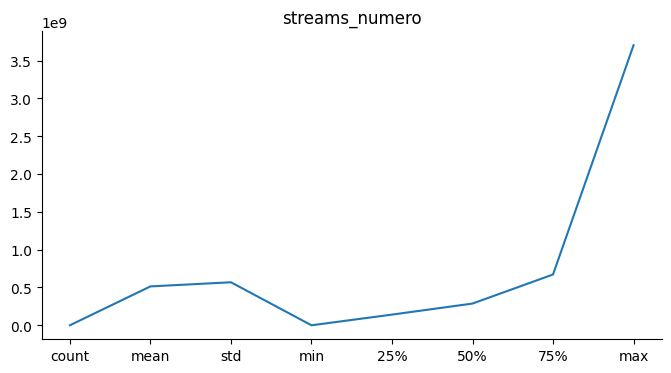

In [125]:
from matplotlib import pyplot as plt
_df_1['streams_numero'].plot(kind='line', figsize=(8, 4), title='streams_numero')
plt.gca().spines[['top', 'right']].set_visible(False)

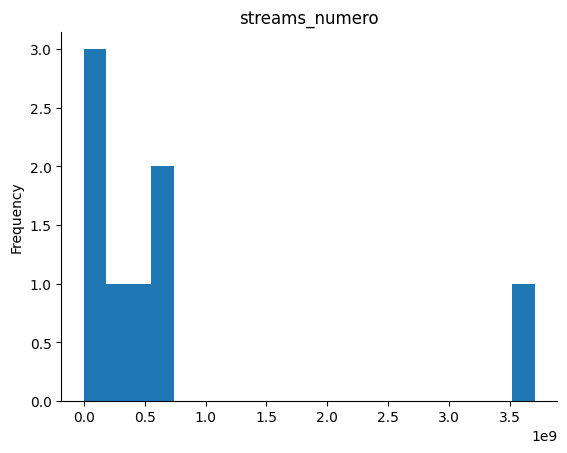

In [124]:
from matplotlib import pyplot as plt
_df_0['streams_numero'].plot(kind='hist', bins=20, title='streams_numero')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Medidas de tendencia central y dispersion por categorias**



**BPM - Alto**

Creamos Query con los datos que necesitamos por categoria



In [129]:
query = """
SELECT c_bpm, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_bpm = 'alto'
"""

Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [130]:
df = client.query(query).to_dataframe()

Tomar filas aleatorias para ver datos en tabla

In [131]:
sample= df.sample(50)
print(sample)

    c_bpm  streams_numero
138  alto        52294266
152  alto       338564981
23   alto       872137015
198  alto       573633020
158  alto       179061440
235  alto       158950978
129  alto        57312735
154  alto       673801126
163  alto       726434358
117  alto      1230855859
126  alto        24975653
212  alto       357580552
83   alto       606361689
167  alto       408843328
118  alto       850608354
121  alto      1374581173
229  alto       185408548
69   alto      1256880657
217  alto       148469433
204  alto       245095641
116  alto       236060709
14   alto       245350949
148  alto       513643924
201  alto       170413877
147  alto       610045621
227  alto        62019074
36   alto      1410088830
72   alto       142095275
52   alto        34450974
38   alto       147290338
196  alto       263453310
101  alto       824420218
11   alto       629173063
115  alto       199587884
6    alto      1840364617
15   alto       178660459
19   alto       236940480
114  alto   

Medidas de tendencia central y dispersion de el dataframe

In [132]:
df.describe()

,streams_numero
count,236.0
mean,523972665.949153
std,566479139.528419
min,2762.0
25%,152715987.25
50%,292010098.0
75%,637837821.5
max,3703895074.0


**BPM-Bajo**

In [133]:
query = """
SELECT c_bpm, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_bpm = 'bajo'
"""

Ejecutar consulta y convertir resultados en dataframe

In [134]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe


In [135]:
df.describe()

,streams_numero
count,708.0
mean,510942615.937853
std,570026192.414233
min,1365184.0
25%,138031794.75
50%,286569820.5
75%,674247766.5
max,3562543890.0


**Danceability-Alto**

In [136]:
query = """
SELECT c_Danceability, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Danceability = 'alto'
"""

Ejecutar consulta y convertir resultados en dataframe

In [137]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [138]:
df.describe()

,streams_numero
count,236.0
mean,424495305.923729
std,482405423.98948
min,1365184.0
25%,137999901.0
50%,251081344.5
75%,542038480.75
max,3562543890.0


**Danceability-Bajo**

In [139]:
query = """
SELECT c_Danceability, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Danceability = 'bajo'
"""

Ejecutar consulta y convertir resultados en dataframe

In [140]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [141]:
df.describe()

,streams_numero
count,708.0
mean,544101735.946328
std,592201207.734998
min,2762.0
25%,143204150.0
50%,302621481.5
75%,723777918.5
max,3703895074.0


**Energy-Alto**

In [145]:
query = """
SELECT c_Energy, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Energy = 'alto'
"""

Ejecutar consulta y convertir resultados en dataframe

In [146]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [147]:
df.describe()

,streams_numero
count,236.0
mean,497463317.182203
std,571021781.954513
min,11599388.0
25%,135695508.75
50%,264721683.0
75%,595355213.25
max,3703895074.0


**Energy-Bajo**

In [148]:
query = """
SELECT c_Energy, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Energy = 'bajo'
"""

Ejecutar consulta y convertir resultados en dataframe

In [149]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [150]:
df.describe()

,streams_numero
count,708.0
mean,519779065.526836
std,568445374.569031
min,2762.0
25%,144579887.5
50%,295229577.5
75%,674314399.75
max,3562543890.0


**Acousticness - Alto**

In [151]:
query = """
SELECT c_Acousticness, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Acousticness = 'alto'
"""

Ejecutar consulta y convertir resultados en dataframe

In [152]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [153]:
df.describe()

,streams_numero
count,236.0
mean,531516964.961864
std,627414092.821768
min,16011326.0
25%,127432583.75
50%,283107715.0
75%,726093673.5
max,3562543890.0


**Acousticness - Bajo**

In [154]:
query = """
SELECT c_Acousticness, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Acousticness = 'bajo'
"""

Ejecutar consulta y convertir resultados en dataframe

In [155]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [156]:
df.describe()

,streams_numero
count,708.0
mean,508427849.600282
std,548322493.679222
min,2762.0
25%,145813819.0
50%,291847574.5
75%,655603601.25
max,3703895074.0


**Speechiness - Alto**

In [157]:
query = """
SELECT c_Speechiness, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Speechiness = 'alto'
"""

Ejecutar consulta y convertir resultados en dataframe

In [158]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [159]:
df.describe()

,streams_numero
count,236.0
mean,412181178.949153
std,448029918.212398
min,11956641.0
25%,128813326.0
50%,245247904.0
75%,508495109.5
max,2565529693.0


**Speechiness - Bajo**

In [160]:
query = """
SELECT c_Speechiness, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Speechiness = 'bajo'
"""

Ejecutar consulta y convertir resultados en dataframe

In [161]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [162]:
df.describe()

,streams_numero
count,708.0
mean,548206444.937853
std,600235560.591657
min,2762.0
25%,144332043.75
50%,305710681.0
75%,722242662.0
max,3703895074.0


**Instrumentless - Alto**

In [163]:
query = """
SELECT c_Instrumentless, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Instrumentless = 'alto'
"""

Ejecutar consulta y convertir resultados en dataframe

In [164]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [165]:
df.describe()

,streams_numero
count,236.0
mean,480526738.758475
std,537740212.692881
min,2762.0
25%,162200744.5
50%,286800590.0
75%,571294545.5
max,3703895074.0


**Instrumentless - Bajo**

In [166]:
query = """
SELECT c_Instrumentless, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Instrumentless = 'bajo'
"""

Ejecutar consulta y convertir resultados en dataframe

In [167]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [168]:
df.describe()

,streams_numero
count,708.0
mean,525424591.668079
std,578805495.149547
min,11599388.0
25%,135353000.25
50%,288753739.5
75%,691209901.25
max,3562543890.0


**Liveness - Alto**

In [169]:
query = """
SELECT c_Liveness, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Liveness = 'alto'
"""

Ejecutar consulta y convertir resultados en dataframe

In [170]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [171]:
df.describe()

,streams_numero
count,236.0
mean,488424806.033898
std,540383021.978798
min,1365184.0
25%,126658573.5
50%,256917571.5
75%,597580022.75
max,2713922350.0


**Liveness - Bajo**

In [172]:
query = """
SELECT c_Liveness, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Liveness = 'bajo'
"""

Ejecutar consulta y convertir resultados en dataframe

In [173]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [174]:
df.describe()

,streams_numero
count,708.0
mean,522791902.576271
std,578167540.632326
min,2762.0
25%,147476812.75
50%,293909333.5
75%,674839569.25
max,3703895074.0


**Valence - Alto**

In [177]:
query = """
SELECT c_Valence, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Valence = 'alto'
"""

Ejecutar consulta y convertir resultados en dataframe

In [178]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [179]:
df.describe()

,streams_numero
count,236.0
mean,467693053.440678
std,536004028.786973
min,2762.0
25%,140956768.25
50%,261350338.5
75%,531307346.25
max,3562543890.0


**Valence - Bajo**

In [180]:
query = """
SELECT c_Valence, streams_numero
FROM `proyecto2-hipotesis-lab.Dataset.view_categorias_caract_canciones`
WHERE c_Valence = 'bajo'
"""

Ejecutar consulta y convertir resultados en dataframe

In [181]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [182]:
df.describe()

,streams_numero
count,708.0
mean,529702486.774011
std,578945130.512692
min,1365184.0
25%,141398334.0
50%,297696354.5
75%,687576960.0
max,3703895074.0
